In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [6]:
#read the data 
df_usa = pd.read_csv("/workspaces/07-visualization-ayabz22/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv")
df_afg = pd.read_csv("/workspaces/07-visualization-ayabz22/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-afg--age--gender--year.csv")
df_wsm= pd.read_csv("/workspaces/07-visualization-ayabz22/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-wsm--age--gender--year.csv")
df_sdn = pd.read_csv("/workspaces/07-visualization-ayabz22/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-sdn--age--gender--year.csv")
df_yem = pd.read_csv("/workspaces/07-visualization-ayabz22/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-yem--age--gender--year.csv")

#combine them 
df = pd.concat([
    df_usa,
    df_afg,
    df_wsm,
    df_sdn,
    df_yem
], axis=0, ignore_index=True) 

#find the total population by year and country 
total_population = df.groupby(['year', 'country'])['population'].sum().reset_index() 

countries = ['usa', 'afg', 'wsm', 'sdn', 'yem']
total_population = total_population[total_population['country'].isin(countries)]
print(total_population)

plt.figure(figsize=(10, 6))

px.line(
    total_population,
    x='year',  
    y='population',  
    color='country',  
    markers=True, 
    title='Population per Country per Year',  
    labels={'population': 'Total Population', 'year': 'Year'},  
)


     year country  population
0    1950     afg     7776197
1    1950     sdn     6189922
2    1950     usa   154202691
3    1950     wsm       88322
4    1950     yem     4616800
..    ...     ...         ...
750  2100     afg   130216731
751  2100     sdn   136890752
752  2100     usa   421278894
753  2100     wsm      383570
754  2100     yem   110035637

[755 rows x 3 columns]


<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_14192/1687796222.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_14192/1687796222.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1200x800 with 0 Axes>

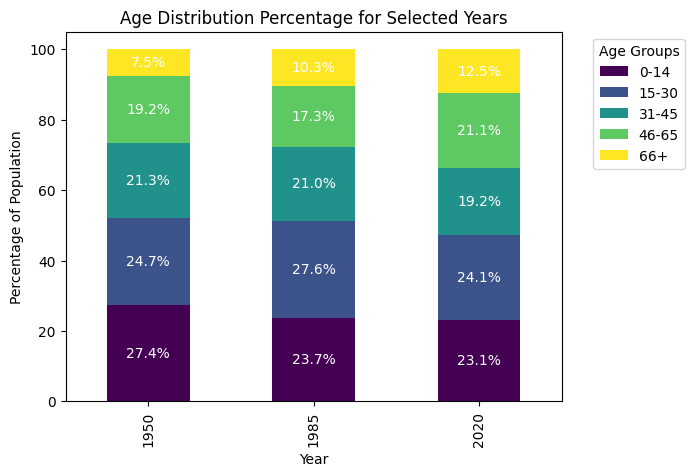

In [9]:
#make the age groups and the years
bins = [0, 14, 30, 45, 65, 120]
labels = ['0-14', '15-30', '31-45', '46-65', '66+']

#get only the specified years
years_specified = [1950, 1985, 2020]
df_filtered = df[df['year'].isin(years_specified)]

#make a new column called age_group
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins = bins, labels = labels, right=False)

#use groupby to get the age distribution 
age_distribution = df_filtered.groupby(['year', 'age_group'])['population'].sum().unstack()

#do the percentage for each age group
age_totals = age_distribution.sum(axis=1)
percentage = age_distribution.apply(lambda row: row / age_totals[row.name] * 100, axis=1)

#make it stacked
plt.figure(figsize=(12, 8)) 
ax = percentage.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Age Distribution Percentage for Selected Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

#make the percentages on the bars
for i in range(len(percentage)):
    for j, age_group in enumerate(percentage.columns):
        total = percentage.iloc[i].sum()
        if total > 0:  # Avoid division by zero
            percentage_value = percentage.iloc[i][age_group]
            ax.text(i, percentage.iloc[i].cumsum()[age_group] - (percentage_value / 2),
                    f'{percentage_value:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()




